In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import os

In [2]:
data = xr.DataArray(np.random.randn(2,3), dims = ('x','y'), coords = {'x':[10,20]})

In [3]:
data

<xarray.DataArray (x: 2, y: 3)>
array([[-0.39384267,  0.05891376, -0.76967599],
       [ 0.96941466,  0.79609649, -0.78042326]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [4]:
xr.DataArray(pd.Series(range(3), index=list("abc"), name="foo"))

<xarray.DataArray 'foo' (dim_0: 3)>
array([0, 1, 2])
Coordinates:
  * dim_0    (dim_0) object 'a' 'b' 'c'

In [5]:
data.values

array([[-0.39384267,  0.05891376, -0.76967599],
       [ 0.96941466,  0.79609649, -0.78042326]])

In [6]:
data.dims

('x', 'y')

In [7]:
data.coords

Coordinates:
  * x        (x) int64 10 20

In [8]:
data.attrs

{}

In [9]:
'''Xarray supports four kinds of indexing. Since we have assigned coordinate labels to the x dimension we can use label-based indexing along that dimension just like pandas. The four examples below all yield the same result (the value at x=10) but at varying levels of convenience and intuitiveness.'''

'Xarray supports four kinds of indexing. Since we have assigned coordinate labels to the x dimension we can use label-based indexing along that dimension just like pandas. The four examples below all yield the same result (the value at x=10) but at varying levels of convenience and intuitiveness.'

In [10]:
# positional and by integer label, like numpy
data[0, :]

<xarray.DataArray (y: 3)>
array([-0.39384267,  0.05891376, -0.76967599])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [11]:
# loc or "location": positional and coordinate label, like pandas
data.loc[10]

<xarray.DataArray (y: 3)>
array([-0.39384267,  0.05891376, -0.76967599])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [12]:
# isel or "integer select":  by dimension name and integer label
data.isel(x=0)

<xarray.DataArray (y: 3)>
array([-0.39384267,  0.05891376, -0.76967599])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [13]:
# sel or "select": by dimension name and coordinate label
data.sel(x=10)

<xarray.DataArray (y: 3)>
array([-0.39384267,  0.05891376, -0.76967599])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [14]:
data.attrs["long_name"] = "random velocity"
data.attrs["units"] = "metres/sec"
data.attrs["description"] = "A random variable created as an example."
data.attrs["random_attribute"] = 123

In [15]:
data.attrs

{'long_name': 'random velocity',
 'units': 'metres/sec',
 'description': 'A random variable created as an example.',
 'random_attribute': 123}

In [16]:
# you can add metadata to coordinates too
data.x.attrs["units"] = "x units"

In [17]:
data + 10

<xarray.DataArray (x: 2, y: 3)>
array([[ 9.60615733, 10.05891376,  9.23032401],
       [10.96941466, 10.79609649,  9.21957674]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [18]:
np.sin(data)

<xarray.DataArray (x: 2, y: 3)>
array([[-0.38373972,  0.05887969, -0.69590259],
       [ 0.82455468,  0.71463103, -0.70358026]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:         random velocity
    units:             metres/sec
    description:       A random variable created as an example.
    random_attribute:  123

In [19]:
data.T

<xarray.DataArray (y: 3, x: 2)>
array([[-0.39384267,  0.96941466],
       [ 0.05891376,  0.79609649],
       [-0.76967599, -0.78042326]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:         random velocity
    units:             metres/sec
    description:       A random variable created as an example.
    random_attribute:  123

In [20]:
data2 = data.sum()

In [21]:
data2

<xarray.DataArray ()>
array(-0.119517)

In [22]:
data.mean(dim="x")

<xarray.DataArray (y: 3)>
array([ 0.287786  ,  0.42750513, -0.77504962])
Dimensions without coordinates: y

In [23]:
pdData = pd.DataFrame(data = np.random.randn(2,2), columns = ('x','y'))
# trying to use 2,3 throws a value error because you dont have enough columns to match the number of entries

In [24]:
pdData

,x,y
0,0.216507,-0.100933
1,-0.141557,1.467968


In [25]:
df = pd.DataFrame(
    [["bar", "one"], ["bar", "two"], ["foo", "one"], ["foo", "two"]],
    columns=["first", "second"])

In [26]:
pd.MultiIndex.from_frame(df)

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('foo', 'one'),
            ('foo', 'two')],
           names=['first', 'second'])

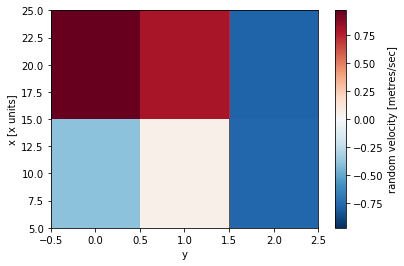

In [27]:
data.plot()

In [28]:
asXarray = pdData.to_xarray()
asXarray

<xarray.Dataset>
Dimensions:  (index: 2)
Coordinates:
  * index    (index) int64 0 1
Data variables:
    x        (index) float64 0.2165 -0.1416
    y        (index) float64 -0.1009 1.468

In [29]:
#asXarray.plot()

In [30]:
#asXarray.plot.scatter()

In [31]:
ls -alt

total 6600
drwxr-xr-x  13 epicgilco  admin      416 Aug 17 12:34 user_profiles_Xseries/
drwxr-xr-x  26 epicgilco  admin      832 Aug 17 12:33 ./
-rw-r--r--   1 epicgilco  admin   458849 Aug 17 12:33 xarray sandbox.ipynb
-rw-r--r--   1 epicgilco  admin    11486 Aug 17 12:13 profile_builder_Xseries_V0.py
drwxr-xr-x   4 epicgilco  admin      128 Aug  3 14:37 .ipynb_checkpoints/
-rw-r--r--@  1 epicgilco  admin    13247 Aug  3 14:17 profile_builderV3.py
-rw-r--r--@  1 epicgilco  admin     6148 Jul 30 09:38 .DS_Store
-rw-r--r--@  1 epicgilco  admin     5994 Jul 30 09:22 mare-botV0_3.py
-rw-r--r--   1 epicgilco  admin     4575 Jul 30 09:11 mare-bot tests.ipynb
drwxr-xr-x   5 epicgilco  admin      160 Jul 26 15:24 __pycache__/
-rw-r--r--   1 epicgilco  admin    10500 Jul 26 15:20 mare-botV0_2.py
-rw-r--r--   1 epicgilco  admin     8966 Jul 26 14:59 profile_builderV2.py
-rw-r--r--   1 epicgilco  admin      415 Jul 23 10:11 testing_module_imports.py
-rw-r--r--   1 epicgilco  admin     6217 Jul 2

In [32]:
a = os.getcwd()

In [33]:
folder = "user_profiles"

In [34]:
destination = os.path.join(a,folder)
destination

'/Volumes/Education/CSCI/Prgm Langs/Python/advanced/discord bots/user_profiles'

In [35]:
temp = f"{destination}/user-data.csv"

In [36]:
temp

'/Volumes/Education/CSCI/Prgm Langs/Python/advanced/discord bots/user_profiles/user-data.csv'

In [37]:
user_data = pd.read_csv(temp, index_col = [0])

In [38]:
cd user_profiles/

/Volumes/Education/CSCI/Prgm Langs/Python/advanced/discord bots/user_profiles


In [39]:
ls

user-data.csv


In [40]:
cd ../

/Volumes/Education/CSCI/Prgm Langs/Python/advanced/discord bots


In [41]:
user_data

,profile_name,profile_type,age_range,gender,pronouns,about_me
0,gilcraos#2111,normal,NaN,NaN,NaN,NaN
1,Regulus#8269,dating,NaN,NaN,NaN,NaN
2,Regulus#8269,normal,NaN,NaN,NaN,NaN


In [42]:
user_data.iloc[1]["gender"]

nan

In [43]:
'''
data = xr.DataArray(np.random.randn(2,3), dims = ('x','y'), coords = {'x':[10,20]})

data

xr.DataArray(pd.Series(range(3), index=list("abc"), name="foo"))

'''
#new_xarray = xr.DataArray(user_data, dims = ('x','y','z'), coords= {'x':[10,20]}) # removed for testing whole script

'\ndata = xr.DataArray(np.random.randn(2,3), dims = (\'x\',\'y\'), coords = {\'x\':[10,20]})\n\ndata\n\nxr.DataArray(pd.Series(range(3), index=list("abc"), name="foo"))\n\n'

In [44]:
# right now i need to figure out how to create a proper 3x3 dimensional 
# xarray so that i can store all these damn profiles and easily access
# their contents in a handful of obfuscated commands

In [45]:
series = data.to_series()

In [46]:
series

x   y
10  0   -0.393843
    1    0.058914
    2   -0.769676
20  0    0.969415
    1    0.796096
    2   -0.780423
dtype: float64

In [47]:
series.to_xarray()

<xarray.DataArray (x: 2, y: 3)>
array([[-0.39384267,  0.05891376, -0.76967599],
       [ 0.96941466,  0.79609649, -0.78042326]])
Coordinates:
  * x        (x) int64 10 20
  * y        (y) int64 0 1 2

In [48]:
ds = xr.Dataset(dict(foo = data, bar = ("x", [1,2]), baz = np.pi))

In [49]:
ds

<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Data variables:
    foo      (x, y) float64 -0.3938 0.05891 -0.7697 0.9694 0.7961 -0.7804
    bar      (x) int64 1 2
    baz      float64 3.142

In [50]:
ds["foo"]

<xarray.DataArray 'foo' (x: 2, y: 3)>
array([[-0.39384267,  0.05891376, -0.76967599],
       [ 0.96941466,  0.79609649, -0.78042326]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:         random velocity
    units:             metres/sec
    description:       A random variable created as an example.
    random_attribute:  123

In [51]:
ds["baz"]

<xarray.DataArray 'baz' ()>
array(3.14159265)

In [52]:
# remember this is similar to pandas.DataFrame.loc[] & .iloc[]
# https://docs.xarray.dev/en/stable/generated/xarray.Dataset.isel.html#xarray.Dataset.isel
# https://docs.xarray.dev/en/stable/user-guide/indexing.html#indexing

#ds.foo.sel()
#ds[[0,0,0], ]

In [53]:
frame1 = ["1a", "1b", "1c"],["2a", "2b", "2c"],["3a", "3b", "3c"]
frame2 = ["1m", "1n", "1o"],["2m", "2n", "2o"],["3m", "3n", "3o"]
frame3 = ["1x", "1y", "1z"],["2x", "2y", "2z"],["3x", "3y", "3z"]

In [54]:
pd_f1 = pd.DataFrame(frame1)
pd_f2 = pd.DataFrame(frame2)
pd_f3 = pd.DataFrame(frame3)

In [55]:
pd_f3

,0,1,2
0,1x,1y,1z
1,2x,2y,2z
2,3x,3y,3z


In [56]:
# works
xr_dataset = xr.Dataset({'f1':pd_f1, 'f2':pd_f2, 'f3':pd_f3})

In [57]:
xr_dataset

<xarray.Dataset>
Dimensions:  (dim_0: 3, dim_1: 3)
Coordinates:
  * dim_0    (dim_0) int64 0 1 2
  * dim_1    (dim_1) int64 0 1 2
Data variables:
    f1       (dim_0, dim_1) object '1a' '1b' '1c' '2a' '2b' '2c' '3a' '3b' '3c'
    f2       (dim_0, dim_1) object '1m' '1n' '1o' '2m' '2n' '2o' '3m' '3n' '3o'
    f3       (dim_0, dim_1) object '1x' '1y' '1z' '2x' '2y' '2z' '3x' '3y' '3z'

In [58]:
# all work
xr_dataset['f2']
#xr_dataset['f2'][2]
#xr_dataset['f2'][0][0]

<xarray.DataArray 'f2' (dim_0: 3, dim_1: 3)>
array([['1m', '1n', '1o'],
       ['2m', '2n', '2o'],
       ['3m', '3n', '3o']], dtype=object)
Coordinates:
  * dim_0    (dim_0) int64 0 1 2
  * dim_1    (dim_1) int64 0 1 2

In [59]:
xr_dataset['f2'][2]

<xarray.DataArray 'f2' (dim_1: 3)>
array(['3m', '3n', '3o'], dtype=object)
Coordinates:
    dim_0    int64 2
  * dim_1    (dim_1) int64 0 1 2

In [60]:
xr_dataset['f2'][0][0]

<xarray.DataArray 'f2' ()>
array('1m', dtype=object)
Coordinates:
    dim_0    int64 0
    dim_1    int64 0

In [61]:
xr_dataset['f2'][0][0] = 42

In [62]:
xr_dataset

<xarray.Dataset>
Dimensions:  (dim_0: 3, dim_1: 3)
Coordinates:
  * dim_0    (dim_0) int64 0 1 2
  * dim_1    (dim_1) int64 0 1 2
Data variables:
    f1       (dim_0, dim_1) object '1a' '1b' '1c' '2a' '2b' '2c' '3a' '3b' '3c'
    f2       (dim_0, dim_1) object 42 '1n' '1o' '2m' '2n' '2o' '3m' '3n' '3o'
    f3       (dim_0, dim_1) object '1x' '1y' '1z' '2x' '2y' '2z' '3x' '3y' '3z'

In [63]:
#parse existing user data

In [64]:
csv_files21 = []
dataFrames21 = []
for file in os.listdir('/Volumes/Education/CSCI/Prgm Langs/Python/advanced/discord bots/user_profiles_Xseries'):
    if (file.endswith(".csv")) and (file.startswith("settings") is False):
        csv_files21.append(file)
        temp = (pd.read_csv(f"/Volumes/Education/CSCI/Prgm Langs/Python/advanced/discord bots/user_profiles_Xseries/{file}", index_col = [0]))
        dataFrames21.append(temp)
dict_of_df = dict()
count = len(pd.read_csv(f"/Volumes/Education/CSCI/Prgm Langs/Python/advanced/discord bots/user_profiles_Xseries/{file}", index_col = [0]))

In [65]:
count

0

In [66]:
# experimenting with accessing deets about a dataarray/dataframe within a standard list
dataFrames21[0].values.shape[1] # this is a viable way to get the number of columns in the xr.dataarray aka pd.dataframe

5

In [67]:
dataFrames21[0].columns

Index(['profile_name', 'age_range', 'gender', 'pronouns', 'about_me'], dtype='object')

In [68]:
dataFrames21[0].count

<bound method DataFrame.count of Empty DataFrame
Columns: [profile_name, age_range, gender, pronouns, about_me]
Index: []>

In [69]:
len(dataFrames21[0].columns) # this is another good method to get the number of columns

5

In [70]:
# trying to make each dataframe a data array for xr
dataArrays = []
for each in dataFrames21:
    dataArrays.append(xr.DataArray(each))
dataArrays

[<xarray.DataArray (dim_0: 0, dim_1: 5)>
 array([], shape=(0, 5), dtype=object)
 Coordinates:
   * dim_0    (dim_0) object 
   * dim_1    (dim_1) object 'profile_name' 'age_range' ... 'pronouns' 'about_me',
 <xarray.DataArray (dim_0: 0, dim_1: 5)>
 array([], shape=(0, 5), dtype=object)
 Coordinates:
   * dim_0    (dim_0) object 
   * dim_1    (dim_1) object 'profile_name' 'age_range' ... 'pronouns' 'about_me',
 <xarray.DataArray (dim_0: 0, dim_1: 5)>
 array([], shape=(0, 5), dtype=object)
 Coordinates:
   * dim_0    (dim_0) object 
   * dim_1    (dim_1) object 'profile_name' 'age_range' ... 'pronouns' 'about_me',
 <xarray.DataArray (dim_0: 0, dim_1: 5)>
 array([], shape=(0, 5), dtype=object)
 Coordinates:
   * dim_0    (dim_0) object 
   * dim_1    (dim_1) object 'profile_name' 'age_range' ... 'pronouns' 'about_me',
 <xarray.DataArray (dim_0: 0, dim_1: 5)>
 array([], shape=(0, 5), dtype=object)
 Coordinates:
   * dim_0    (dim_0) object 
   * dim_1    (dim_1) object 'profile_name' 'age

In [71]:
#this worked before when i didnt add sample values to default-profile.csv @2:59pm 8/17/22
primer_for_dataset = dict()
for darray, file in zip(dataArrays, csv_files21):
    #updated = darray
    primer_for_dataset[file] = darray
dataSet = xr.Dataset(primer_for_dataset)
dataSet

ValueError: cannot reindex or align along dimension 'dim_0' because the (pandas) index has duplicate values

In [ ]:
# trying to deprecate this part
for df, file in zip(dataFrames21, csv_files21):
    dict_of_df[file] = df
print(dict_of_df)

In [ ]:
dict_of_df

In [ ]:
csv_files21

In [ ]:
dataFrames21

In [ ]:
profiles = xr.Dataset(dict_of_df)

In [ ]:
profiles

In [ ]:
# testing out issue originating from get_one_index()
profiles['default-profile.csv']

In [ ]:
profiles['default-profile.csv'].dim_1[2] # IT WORKS!! potential solution syntax for get_one_index()

In [ ]:
profiles['default-profile.csv'].var

In [72]:
testshapes = pd.read_csv(f"/Volumes/Education/CSCI/Prgm Langs/Python/advanced/discord bots/user_profiles_Xseries/dating-profile.csv", index_col = [0])
testshapes

,profile_name,age_range,gender,pronouns,about_me


In [91]:
xrshapes = xr.DataArray(testshapes)
xrshapes

<xarray.DataArray (dim_0: 0, dim_1: 5)>
array([], shape=(0, 5), dtype=object)
Coordinates:
  * dim_0    (dim_0) object 
  * dim_1    (dim_1) object 'profile_name' 'age_range' ... 'pronouns' 'about_me'

In [99]:
a = pd.read_csv("/Volumes/Education/CSCI/Prgm Langs/Python/advanced/discord bots/user_profiles_Xseries/default-profile.csv")
b = pd.DataFrame.to_dict(a) # works okay
c = a.to_xarray() # works

#xrshapes.reindex(b) # didnt work @ 3:30pm 8/17/22

# works fine
samplexarr = c
samplexarr['age_range']

# trying to make xrshapes get updated to the contents of newarray, works
newarray = c
print("before change: \n", newarray['age_range'][5])
newarray['age_range'][5] = 100
print("after change: \n",newarray['age_range'][5])

print("\n\n",type(newarray))
print(type(newarray['age_range']))
print(type(newarray['age_range'][5]))


#dict('profile_name': 'doug', 'age_range': 44, 'gender':M, 'pronouns': he/him, 'about_me': i like pie)

before change: 
 <xarray.DataArray 'age_range' ()>
array(29)
Coordinates:
    index    int64 5
after change: 
 <xarray.DataArray 'age_range' ()>
array(100)
Coordinates:
    index    int64 5


 <class 'xarray.core.dataset.Dataset'>
<class 'xarray.core.dataarray.DataArray'>
<class 'xarray.core.dataarray.DataArray'>


In [100]:
# testing how to add new data-arrays to a data-set

In [114]:
q = pd.read_csv(f"/Volumes/Education/CSCI/Prgm Langs/Python/advanced/discord bots/user_profiles_Xseries/default-profile.csv", index_col = [0])
r = pd.read_csv(f"/Volumes/Education/CSCI/Prgm Langs/Python/advanced/discord bots/user_profiles_Xseries/gaming-profile.csv", index_col = [0])
s = pd.read_csv(f"/Volumes/Education/CSCI/Prgm Langs/Python/advanced/discord bots/user_profiles_Xseries/dating-profile.csv", index_col = [0])
t = pd.read_csv(f"/Volumes/Education/CSCI/Prgm Langs/Python/advanced/discord bots/user_profiles_Xseries/mental-health-profile.csv", index_col = [0])

In [166]:
qrst_set = xr.Dataset()

qrst_set['default'] = q
#print(qrst_set)
qrst_set.isel(dim_0 = -1)  # works fine
qrst_set.isel(dim_1 = 1)   # works fine
qrst_set.sel(dim_1 = 'age_range') # trying to use just the column names, and works fine!
qrst_set.sizes # comes out as a xarray.core.Frozen type
qrst_set.dims # also comes out as an xarray.core.Frozen type
len(qrst_set) # number of dataarrays in the dataset
len(qrst_set['default'].dim_0) # yields the total number of INDICIES in a specific dataarray
len(qrst_set['default'].dim_1) # yields the total number of COLUMNS in a specific dataarray
# qrst_set['default'].name # gets name of the dataarray within the dataset


#qrst_set.isel('default' = 11) = qrst_set.isel('default' =  -1)

#qrst_set.sizes

#qrst_set['gaming'] = r
#qrst_set['dating'] = s
#qrst_set['mental-health'] = t

# print(qrst_set['dating'])
# as expected, dataset will store dataframes of different dimensions, but it wont play nice with them afterwards.

# need to either correct their dimensions BEFORE moving to xarray...or afterwards

5

In [174]:
# STILL EXPERIMENTING AS OF 8/28/22
# experimenting with how to add new indicies to exisiting xarray.dataset.dataarray
qrst_set['default'].dim_0.iloc[8] = 9
#qrst_set['default'][9,:] = qrst_set['default'][-1]

AttributeError: 'DataArray' object has no attribute 'iloc'

In [179]:
# dictionary test -- is it the key-value, key, or just value that gets used when iterating through a dict's elements
sample_dict = {
    'name' : 'rory',
    'age' : 22,
    'height' : 162,
    'weight' : 140
}

# only yields keys, ill need to use another iterator and zip()
# ... also lets be sure to specify dict().keys & dict().values
for x in sample_dict:
    print(x)

name
age
height
weight


In [185]:
# ERROR -- TypeError:'builtin_function_or_method' object is not iterable
# oops. i did a dumb, didnt treat .keys and .values as FUNCTIONS. that is to say i forgot the () after each
for x,y in zip(sample_dict.keys(), sample_dict.values()):
    print(x)
    print(y)

name
rory
age
22
height
162
weight
140


In [184]:
sample_dict.keys()

dict_keys(['name', 'age', 'height', 'weight'])